
# Imports and Magics

In [1]:
%matplotlib inline
from utils.setup import *

In [2]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
train.index = pd.to_datetime(train.index)

# Data Info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2013-10-13 00:00:00 to 2018-12-10 23:30:00
Data columns (total 30 columns):
IDS                                                            70128 non-null int64
Injection RTE (W)                                              70128 non-null int64
Refoulement RTE (W)                                            70128 non-null int64
Pertes modélisées (W)                                          70128 non-null int64
Consommations totale (W)                                       70128 non-null int64
Consommation HTA télérelevée à courbe de charge (W)            70128 non-null int64
Consommation totale profilée (W)                               70128 non-null int64
Consommation HTA profilée (W)                                  70128 non-null int64
Consommation PME-PMI profilée (W)                              70128 non-null int64
Consommation professionnelle profilée (W)                      70128 non-null int64
Consommation rés

In [5]:
train.drop('Pseudo rayonnement', axis=1, inplace=True)

We can see that "Pseudo rayonnement" features has a lot of missing data.
Targets PRO1_BASE, PRO2_HC and PRO2_HP data collect began after the others.

In [6]:
train.tail()

,IDS,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Consommation HTA totale (W),Soutirage net vers autres GRD (W),RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
Horodate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-10 21:30:00,87644,31579849000,2548221000,1976400941,32536487326,10240564700,22295922626,1238607167,3794270153,4136602628,13126442678,5766210733,5752135000,14075733,0.0,5006666.0,291.25,286.95,4.894383e+09,9618333.0,11479171867,284950466,1.089678,0.821245,0.678867,0.349453,0.784780,0.252718,0.989715
2018-12-10 22:00:00,87645,31343255000,2419413000,1961002427,32310196907,10124453189,22185743718,1301112696,3639951271,4050688139,13193991612,5629164567,5615041000,14123567,0.0,5006666.0,291.15,286.85,4.763672e+09,4707000.0,11425565885,281807233,1.015665,0.761797,0.648582,0.456093,0.740596,0.415336,0.892311
2018-12-10 22:30:00,87646,33724718000,2335097000,2124504495,34631201532,9993635543,24637565989,1256320969,3377444203,3860606525,16143194292,5686164210,5671975000,14189210,0.0,5006666.0,291.15,286.75,4.815567e+09,9613667.0,11249956512,320079183,0.933686,0.712244,0.627947,1.589384,0.493164,1.133374,0.611383
2018-12-10 23:00:00,87647,33587792000,2339096000,2113537812,34464682817,9860052803,24604630014,1201800692,3266362309,3764137915,16372329098,5662902696,5648731667,14171029,0.0,5006666.0,291.15,286.75,4.792907e+09,8703667.0,11061853495,333378067,0.854366,0.648307,0.611321,1.879294,0.384141,1.422813,0.470623
2018-12-10 23:30:00,87648,33178674000,2189368000,2091509213,34150437136,9715383364,24435053772,1177425244,3119025885,3673134488,16465468154,5590422949,5576354667,14068282,0.0,5006666.0,291.15,286.75,4.728934e+09,40000.0,10892808608,337782600,0.789682,0.603477,0.591173,2.302363,0.256934,1.858916,0.292061


In [7]:
pd.date_range(start='2013-10-13 00:00:00', end='2018-12-10 23:30:00',freq='30min')
pd.date_range(start='2017-07-01 00:00:00', end='2018-06-30 23:30:00',freq='30min')

DatetimeIndex(['2017-07-01 00:00:00', '2017-07-01 00:30:00',
               '2017-07-01 01:00:00', '2017-07-01 01:30:00',
               '2017-07-01 02:00:00', '2017-07-01 02:30:00',
               '2017-07-01 03:00:00', '2017-07-01 03:30:00',
               '2017-07-01 04:00:00', '2017-07-01 04:30:00',
               ...
               '2018-06-30 19:00:00', '2018-06-30 19:30:00',
               '2018-06-30 20:00:00', '2018-06-30 20:30:00',
               '2018-06-30 21:00:00', '2018-06-30 21:30:00',
               '2018-06-30 22:00:00', '2018-06-30 22:30:00',
               '2018-06-30 23:00:00', '2018-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq='30T')

In [8]:
90480-17520

72960

# Plots

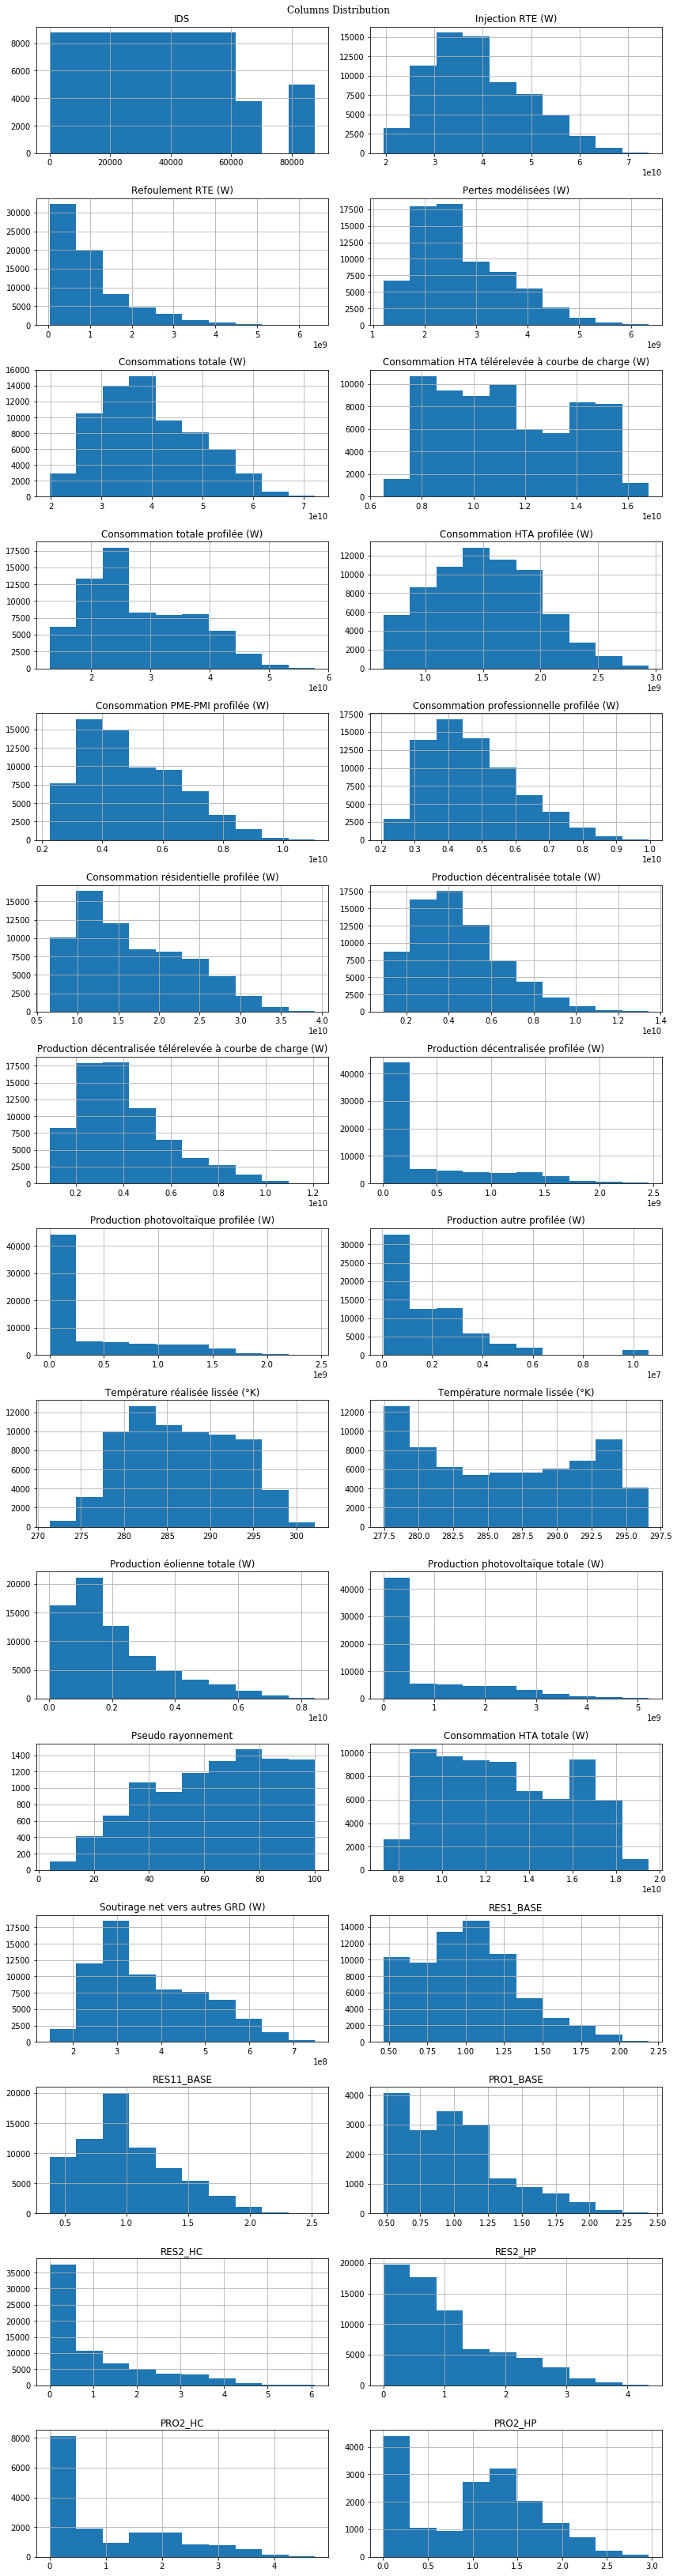

In [4]:
hist_plot(train)

# Correlations

## Features Correlation with Targets

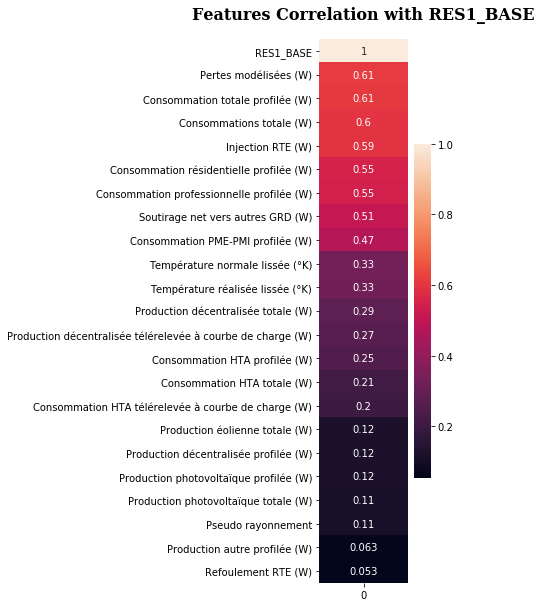

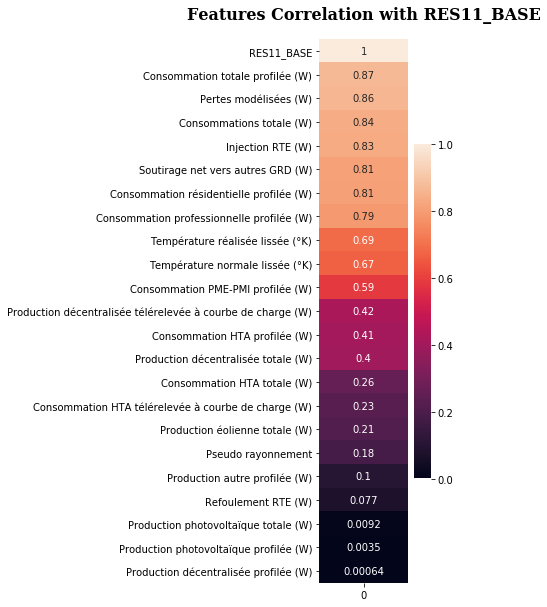

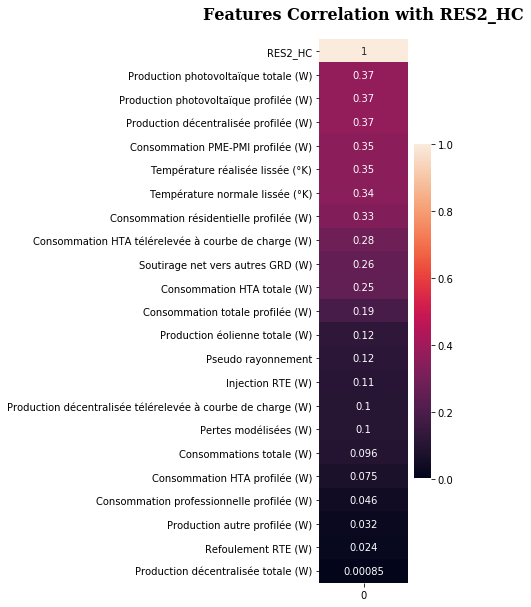

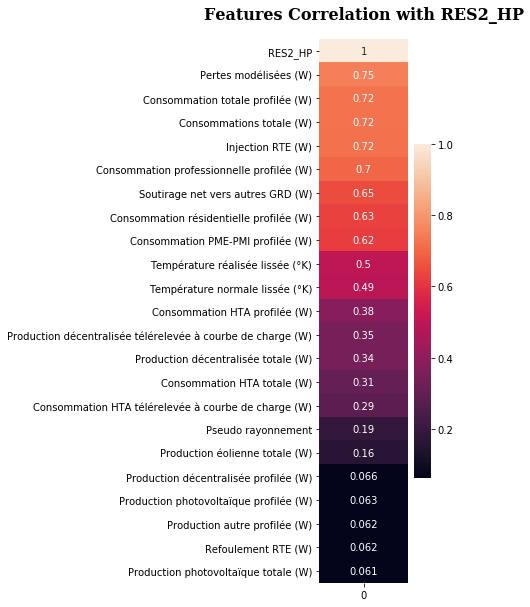

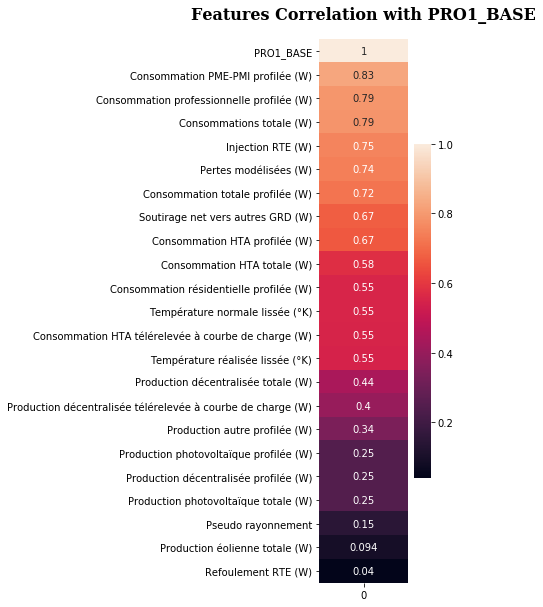

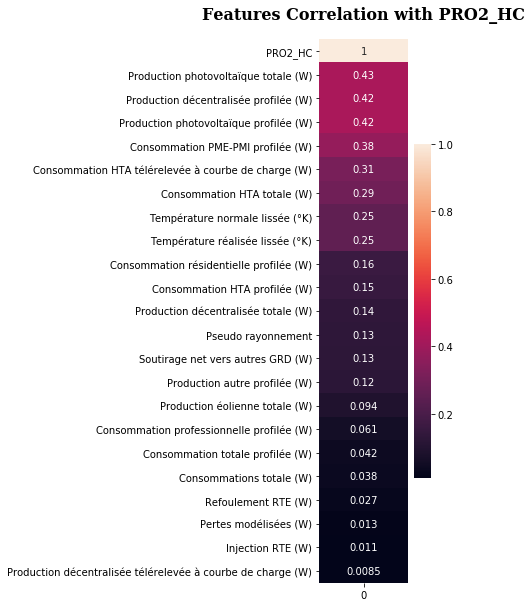

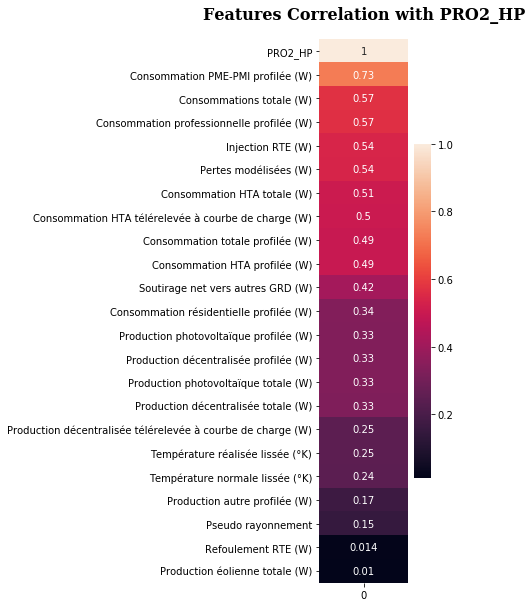

In [5]:
plot_feature_corr(train,TARGETS,True)

## Features Inter Correlation

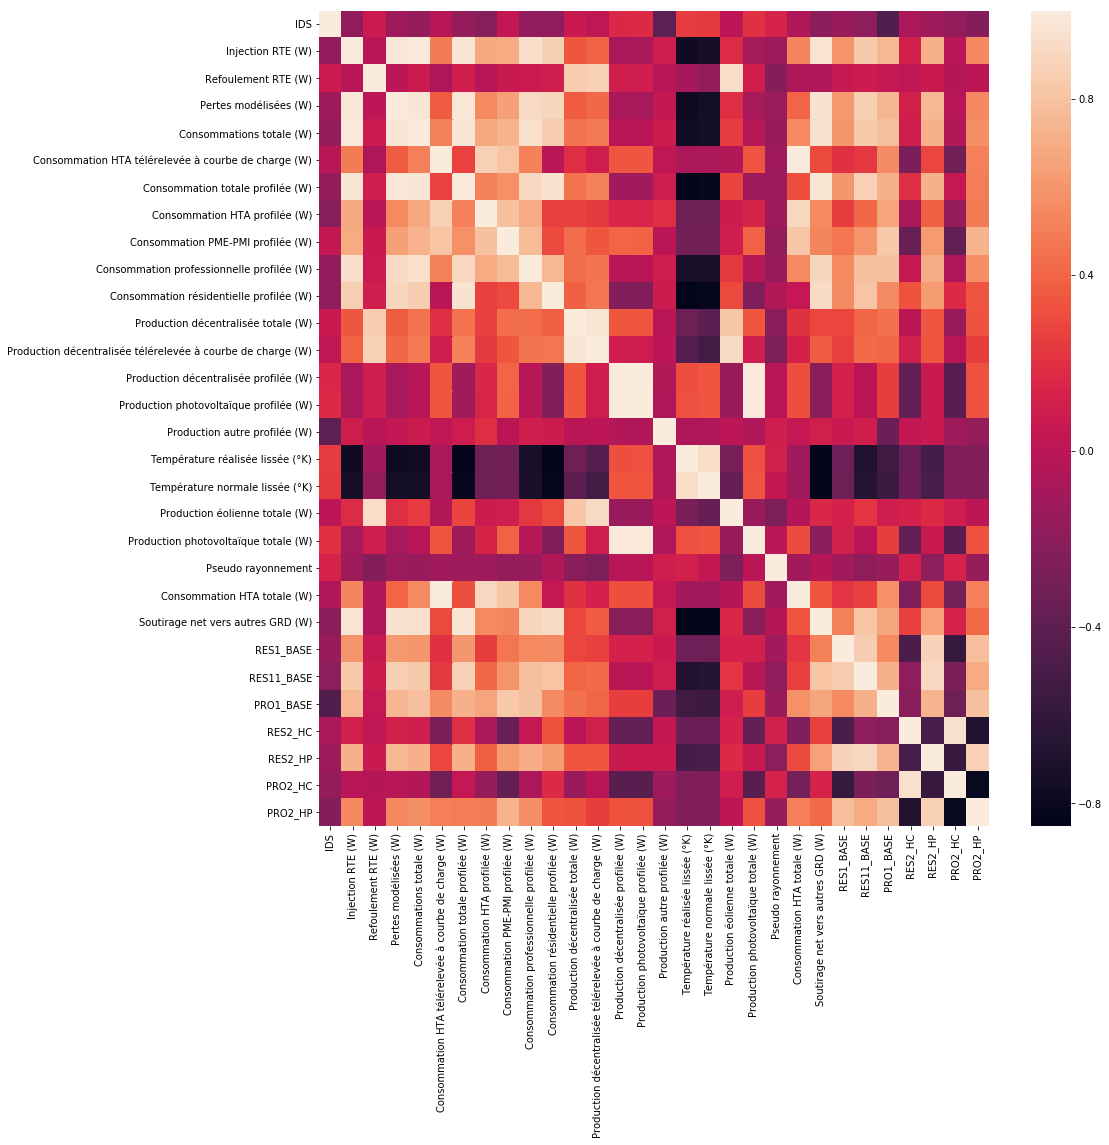

In [6]:
corr_matrix(train, True)

We can see that a lot of features are highly correlated with each other, it creates unnecessary complexity. We will have to delete some of them without fearing a lot of information loss.

# Time Series Analysis

## Simple plot

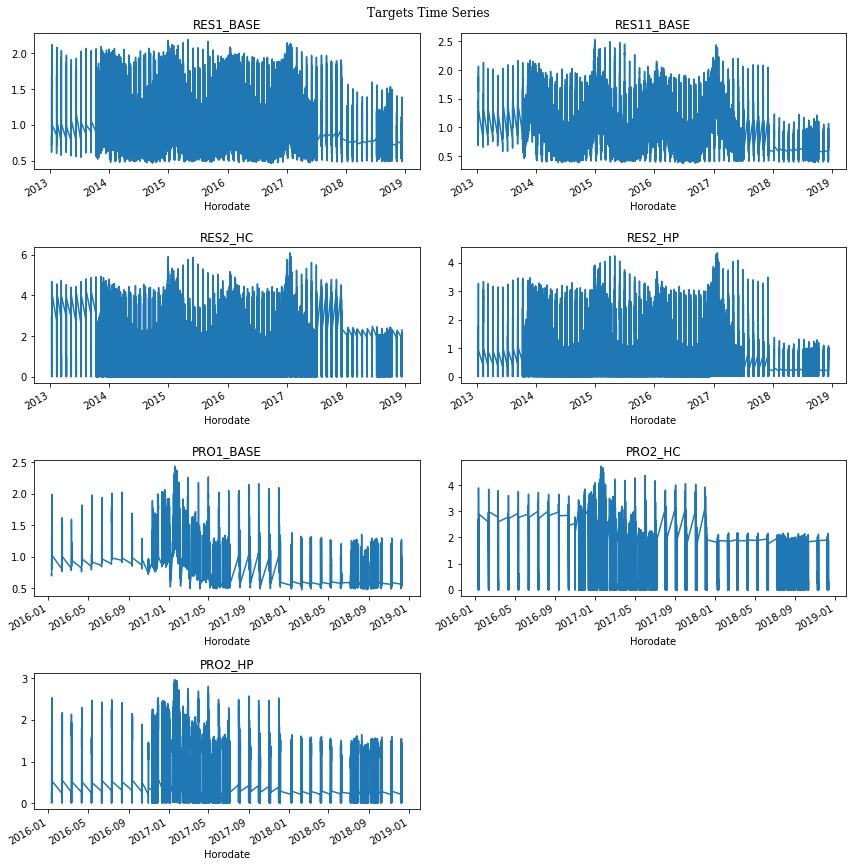

In [4]:
ts_simple_plot(train, TARGETS)

**First observation**
    
   We can obvioulsy see that each target follows a trend. Moreover we observe that we have a lack of information in the begining and the end of the datasets, we probably will delete these periods to train our model. We also have a gap for the period from July 1st 2017 to June 30th 2018 which is normal because it matches the test period of the challenge. We will use this period to test our future model.
   
**Second observation**

   There should not be data within the period between 1st July 2017 and 30th June 2018 as it is the test period. 
   
**Third observation**

   If we look closer we can see that we have data indexed before 13th October 2019. However, Enedis specified that the data collection began on that date. Moreover we can see that there are some problems in 2018 data which don't seem to follow the global trend. My guess is that Enedis changed the year of some 2018 data for 2013 to spice up the challenge. That's what will see below.
   
**Fourth observation**

   Enedis also specified that the data collection for commercial profiles began on the 1st November 2016, we can see here that it begins before that date.

## Missing Data Problem

For a better understanding we will split the train dataset in two parts : a residential part and a porfessional part.

### Residential data

I generated a pandas Serie that shows if some horodate are missing within the date range between 13th October 2013 and 12th October 2018. Its value is 1 if the date has a line in the provided dataframe and 0 if not. The creation of this Serie took my CPU 5 hours of work that's why I import it from a csv. We'll create two sub Series from it for 2013 and 2018 and see what we get if we plot them on the same scale !

In [9]:
res_train = train.copy()

In [10]:
#miss_data = list(pd.date_range(start='2013-01-01 00:00', end='2018-12-10 23:30', freq='0.5H').normalize())
#miss_data = pd.Series([1 if ind in list(train.index) else 0 for ind in miss_data], index=miss_data, name='Inter')

miss = pd.Series.from_csv('miss_data.csv', index_col=0, header=None)
miss_2013 = miss['2013-01-11':'2013-12-13'].copy()
miss_2018 = miss['2018-01-11':'2018-12-13'].copy()
miss_2018.index = [ind.replace(year=2013) for ind in list(miss_2018.index)]

/usr/lib64/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [11]:
def data_gap_viz(miss_dfs, miss_names):
    
    plt.figure(figsize=(16,8))
    plt.title('Missing Time Series Data')
    for i, miss in enumerate(miss_dfs):
        miss.plot(legend=True, label=miss_names[i])
        plt.fill_between(miss.index, 0, miss)
    plt.show()

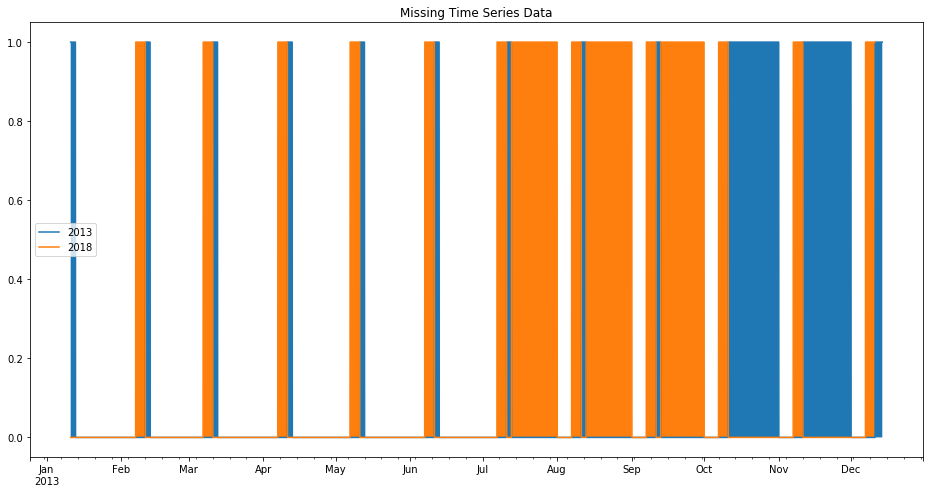

In [12]:
data_gap_viz([miss_2013, miss_2018],['2013', '2018'])

We can see that the data before 13th October 2013 fill the gap of missing 2018 values, our expectations are confirmed ! We can also see that the data before 30th June 2018 (testing period) fill the gap of missing 2018 values. Let's now replace these value in the training dataframe.

In [13]:
#2013 to 2018

to_order = list(res_train.index)
ordered = [ts.replace(year=2018) if ts < pd.Timestamp(2013, 10, 13, 0) else ts for ts in to_order]
res_train['Horodate'] = ordered
res_train.set_index('Horodate', drop=True, inplace=True)
res_train[res_train.index < '2013-10-13']

,IDS,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Consommation HTA totale (W),Soutirage net vers autres GRD (W),RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
Horodate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [14]:
from dateutil.relativedelta import relativedelta

#2nd Half of Testing Period

to_order = list(res_train.index)
ordered = [ts + relativedelta(months=6) if pd.Timestamp(2017, 12, 31, 0) < ts < pd.Timestamp(2018, 7, 1, 0) else ts for ts in to_order]
res_train['Horodate'] = ordered
res_train.set_index('Horodate', drop=True, inplace=True)

In [15]:
#1st Half of Testing Period

to_order = list(res_train.index)
ordered = [ts - relativedelta(months=6) if pd.Timestamp(2017, 6, 30, 0) < ts < pd.Timestamp(2018, 1, 1, 0) else ts for ts in to_order]
res_train['Horodate'] = ordered
res_train.set_index('Horodate', drop=True, inplace=True)

In [16]:
#The  end of 2018 --> 2014

to_order = list(res_train.index)
ordered = [ts - relativedelta(years=4) if pd.Timestamp(2018, 11, 1, 0) < ts else ts for ts in to_order]
res_train['Horodate'] = ordered
res_train.set_index('Horodate', drop=True, inplace=True)

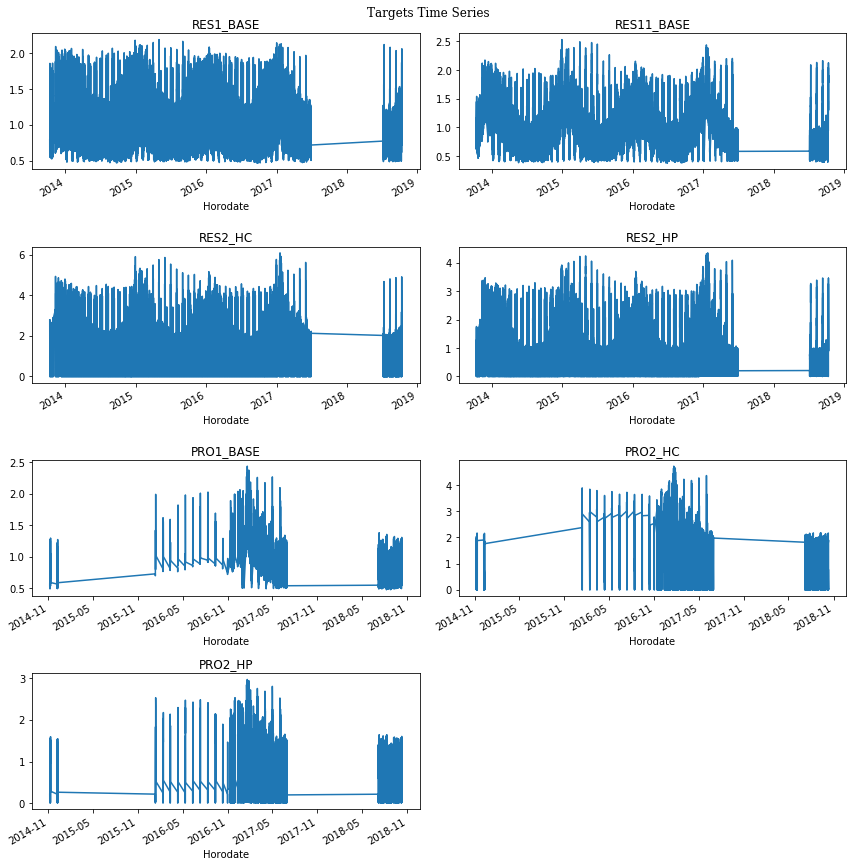

In [17]:
ts_simple_plot(res_train,TARGETS)

### Professional data

Here we just have to apply approximatly the same treatment as the residential part

In [18]:
pro_train = train.dropna().copy()

In [19]:
#2016 to 2018

to_order = list(pro_train.index)
ordered = [ts.replace(year=2018) if ts < pd.Timestamp(2016, 11, 1, 0) else ts for ts in to_order]
pro_train['Horodate'] = ordered
pro_train.set_index('Horodate', drop=True, inplace=True)

In [20]:
#2nd Half of Testing Period

to_order = list(pro_train.index)
ordered = [ts + relativedelta(months=6) if pd.Timestamp(2017, 12, 31, 0) < ts < pd.Timestamp(2018, 7, 1, 0) else ts for ts in to_order]
pro_train['Horodate'] = ordered
pro_train.set_index('Horodate', drop=True, inplace=True)

In [21]:
#1st Half of Testing Period

to_order = list(pro_train.index)
ordered = [ts - relativedelta(months=6) if pd.Timestamp(2017, 6, 30, 0) < ts < pd.Timestamp(2018, 1, 1, 0) else ts for ts in to_order]
pro_train['Horodate'] = ordered
pro_train.set_index('Horodate', drop=True, inplace=True)

In [22]:
#The  end of 2018 --> 2016

to_order = list(pro_train.index)
ordered = [ts - relativedelta(years=2) if pd.Timestamp(2018, 10, 30, 0) < ts else ts for ts in to_order]
pro_train['Horodate'] = ordered
pro_train.set_index('Horodate', drop=True, inplace=True)

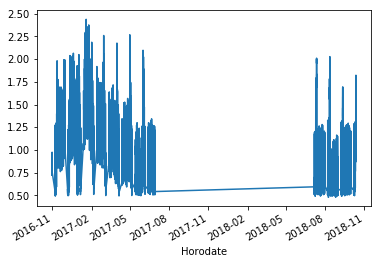

In [23]:
plt.figure()
pro_train['PRO1_BASE'].plot()

## Data reordering

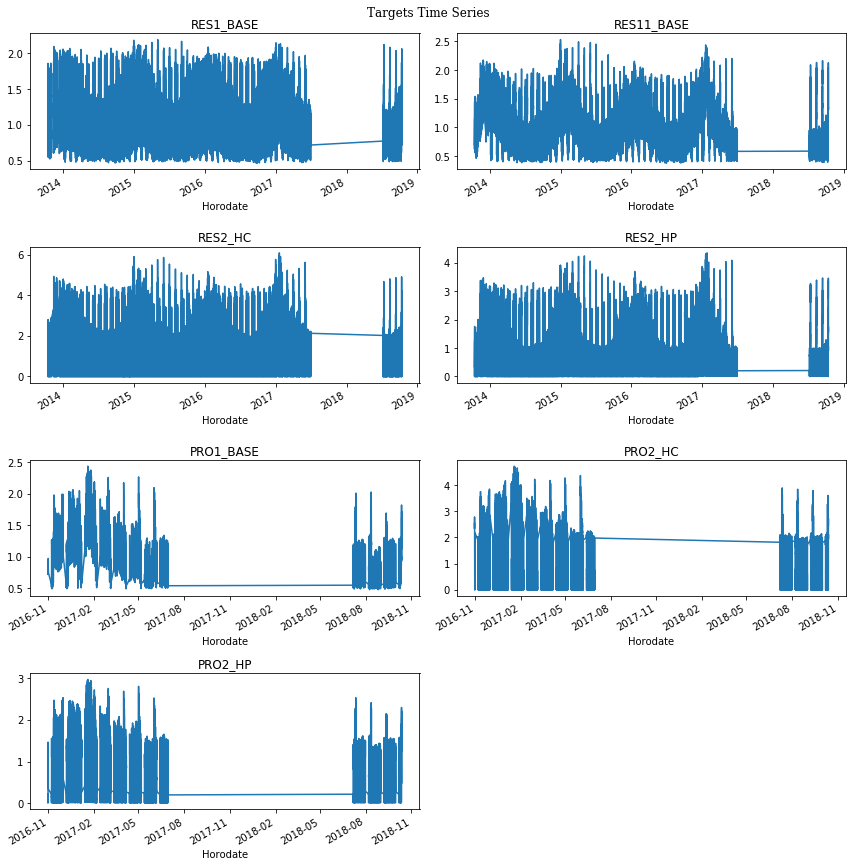

In [24]:
%matplotlib inline
pro_target = ['PRO1_BASE', 'PRO2_HC', 'PRO2_HP']
train = res_train.drop(pro_target, axis=1).join(pro_train[pro_target], how='outer')
ts_simple_plot(train, TARGETS)

## Time Series Trend Analysis

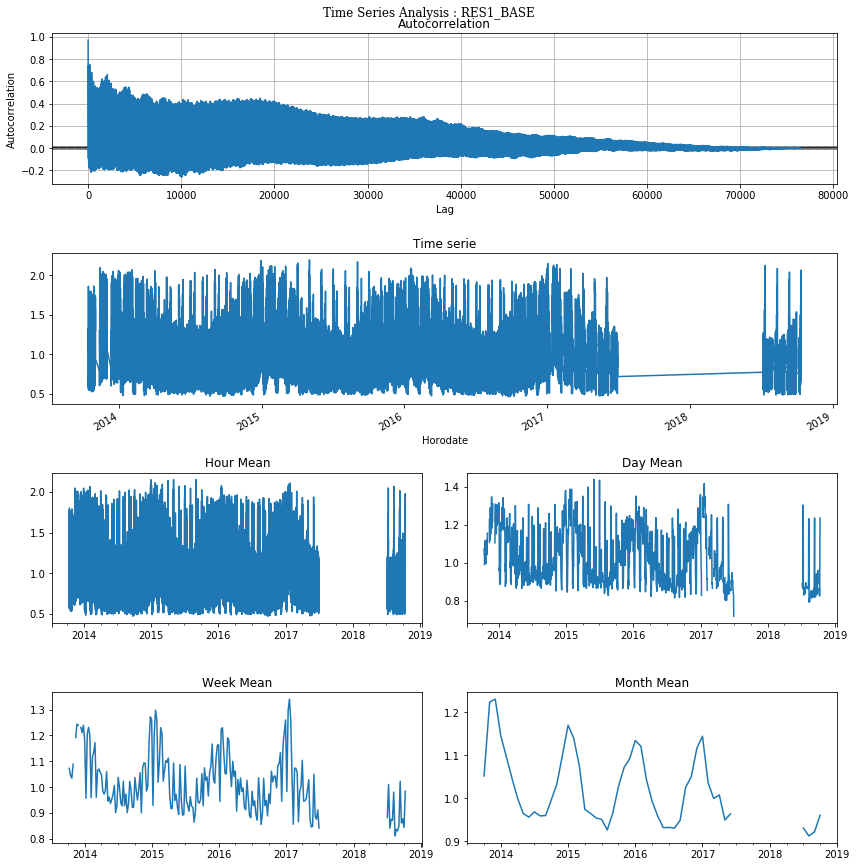

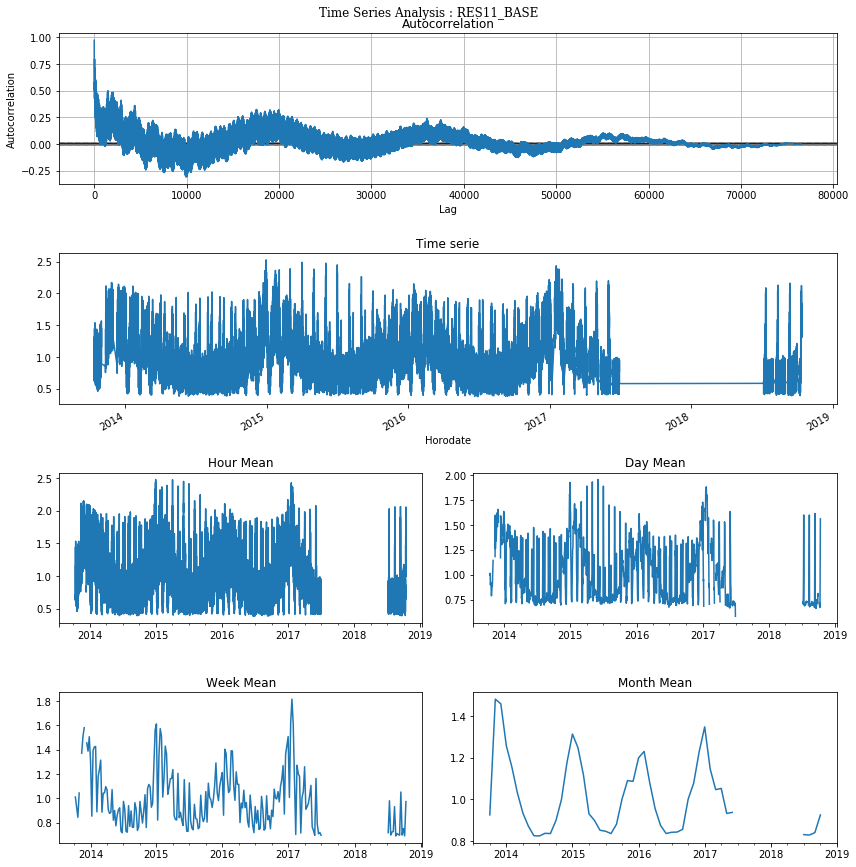

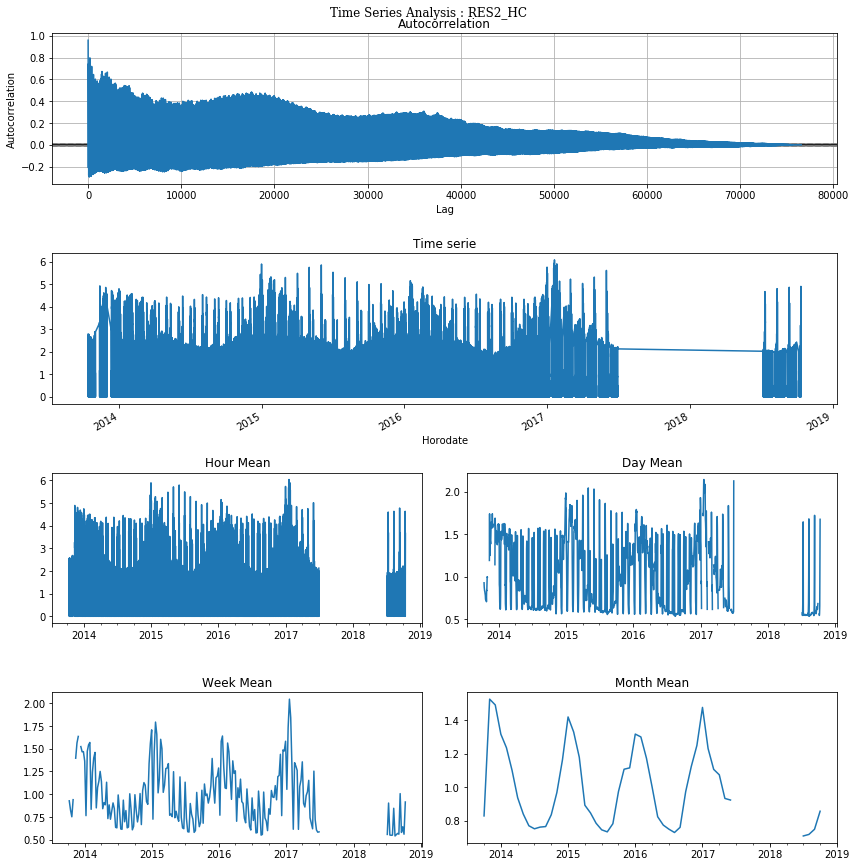

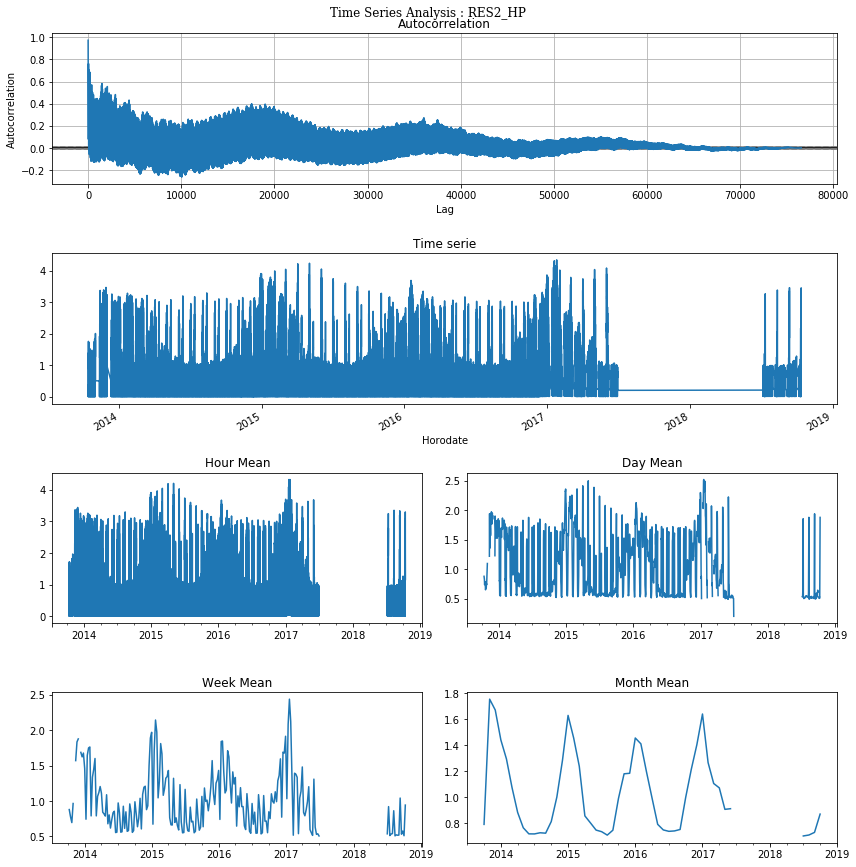

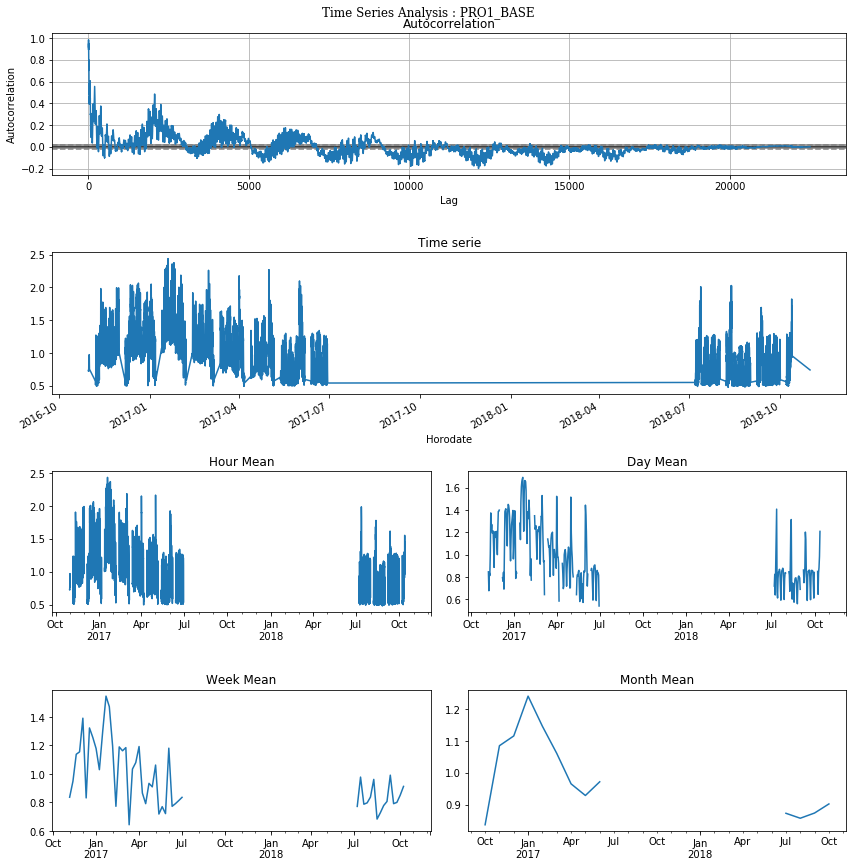

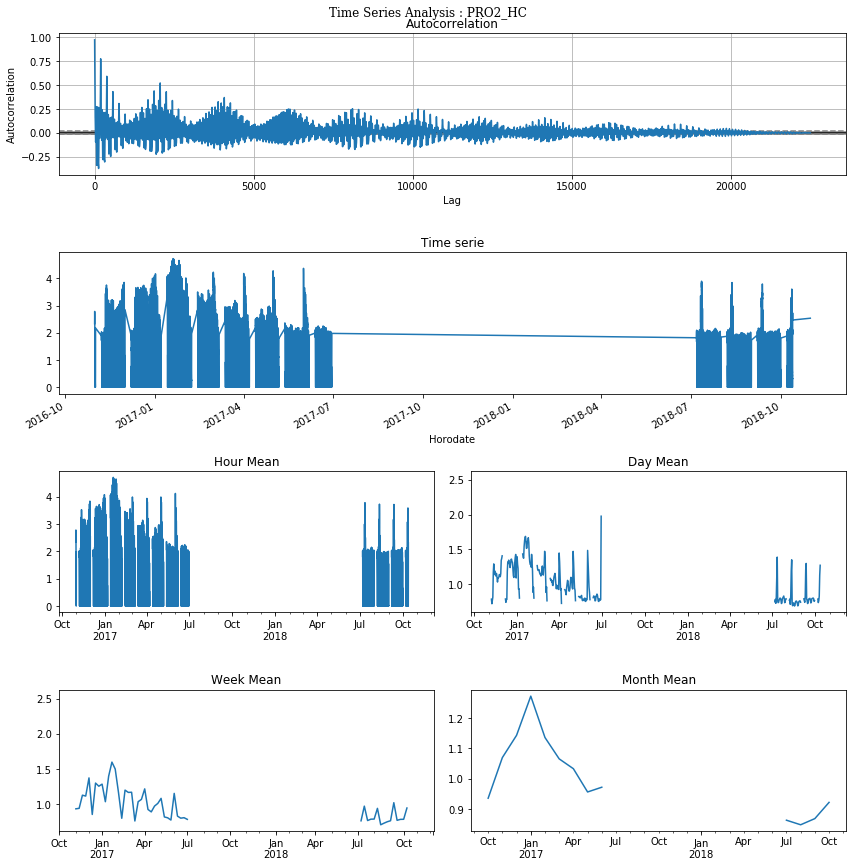

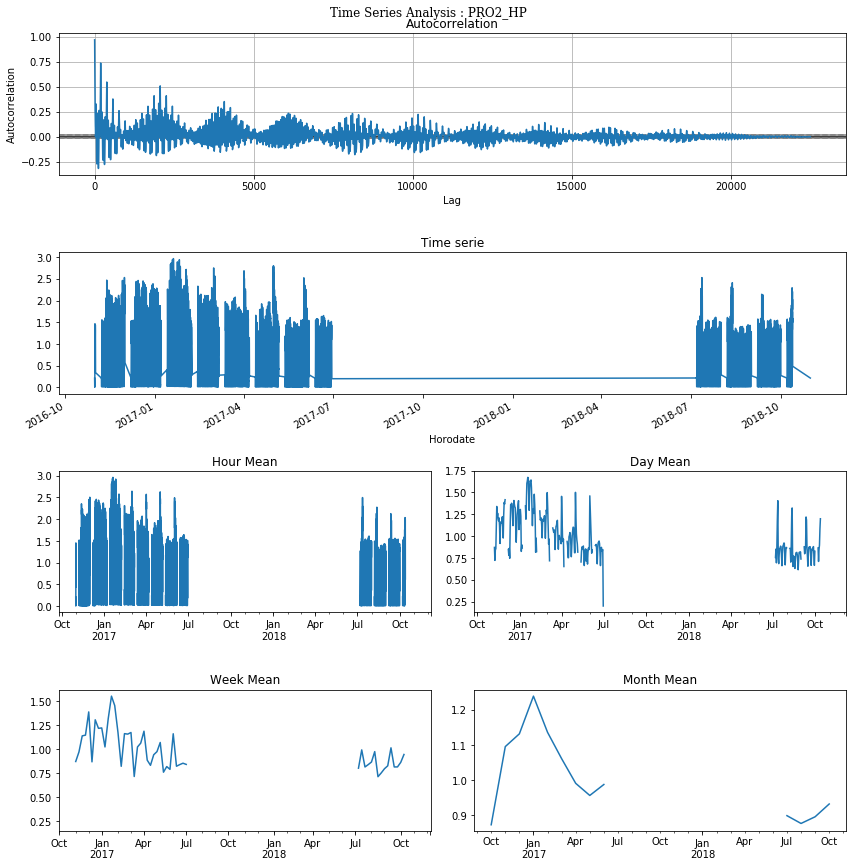

In [68]:
%matplotlib inline
for target in TARGETS:
    ts_analysis_plot(train, target, save=False)

In [69]:
train.to_csv('ts_train.csv')